## Predicting DAX Course using LSTM Neural Network

**Nils Marthiensen - MatNr.: 17203238 - 7. Semester CME**

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Importing the training data set

In [2]:
HistoricDAXValues = pd.read_csv('HistoricDAXValues.csv', low_memory=False, delimiter=';')

Preparing the data

In [3]:
HistoricDAXValues = HistoricDAXValues.drop(columns = {'Datum'})
HistoricDAXValues = HistoricDAXValues.drop(columns = {'Rechnung'})
HistoricDAXValues = HistoricDAXValues.drop(columns = {'Ergebnis'})

In [4]:
HistoricDAXValues['Schluss'] = HistoricDAXValues['Schluss'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValues['Eröffnung'] = HistoricDAXValues['Eröffnung'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValues['Tageshoch'] = HistoricDAXValues['Tageshoch'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValues['Tagestief'] = HistoricDAXValues['Tagestief'].str.replace('.', '').str.replace(',', '.')

In [5]:
HistoricDAXValues = HistoricDAXValues.dropna(axis='rows', how='any')

In [6]:
HistoricDAXValues['Schluss']= HistoricDAXValues['Schluss'].astype(str).astype(float)
HistoricDAXValues['Eröffnung']= HistoricDAXValues['Eröffnung'].astype(str).astype(float)
HistoricDAXValues['Tageshoch']= HistoricDAXValues['Tageshoch'].astype(str).astype(float)
HistoricDAXValues['Tagestief']= HistoricDAXValues['Tagestief'].astype(str).astype(float)

In [7]:
HistoricDAXValues = HistoricDAXValues[['Schluss','Eröffnung','Tageshoch','Tagestief']]
X = HistoricDAXValues.iloc[:, 0:1].values

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X)

In [9]:
X_train = []
y_train = []
for i in range(60, 1262):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Building the model

In [12]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

Setting the parameters for training

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

Actual training of the model

In [14]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0564
Epoch 2/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0170
Epoch 3/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0131: 0s - loss: 0
Epoch 4/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0127
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0107
Epoch 6/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0111
Epoch 7/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0101
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0093
Epoch 9/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0094
Epoch 10/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0080
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0085
Epoch 12/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0077 2s -

Importing the test data set

In [15]:
HistoricDAXValuesNeu = pd.read_csv('HistoricDAXValuesNeu.csv', low_memory=False, delimiter=';')

Preparing the data

In [16]:
HistoricDAXValuesNeu['Schluss'] = HistoricDAXValuesNeu['Schluss'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValuesNeu['Eröffnung'] = HistoricDAXValuesNeu['Eröffnung'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValuesNeu['Tageshoch'] = HistoricDAXValuesNeu['Tageshoch'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValuesNeu['Tagestief'] = HistoricDAXValuesNeu['Tagestief'].str.replace('.', '').str.replace(',', '.')

In [17]:
HistoricDAXValuesNeu = HistoricDAXValuesNeu.dropna(axis='rows', how='any')

In [18]:
HistoricDAXValuesNeu['Schluss']= HistoricDAXValuesNeu['Schluss'].astype(str).astype(float)
HistoricDAXValuesNeu['Eröffnung']= HistoricDAXValuesNeu['Eröffnung'].astype(str).astype(float)
HistoricDAXValuesNeu['Tageshoch']= HistoricDAXValuesNeu['Tageshoch'].astype(str).astype(float)
HistoricDAXValuesNeu['Tagestief']= HistoricDAXValuesNeu['Tagestief'].astype(str).astype(float)

In [19]:
real_price = HistoricDAXValuesNeu.iloc[:, 1:2].values

In [20]:
dataset_total = pd.concat((HistoricDAXValues['Schluss'], HistoricDAXValuesNeu['Schluss']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(HistoricDAXValuesNeu) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

Making predictions on the new data with our existing model

In [21]:
X_test = []
for i in range(60, 157):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

Visualizing the results

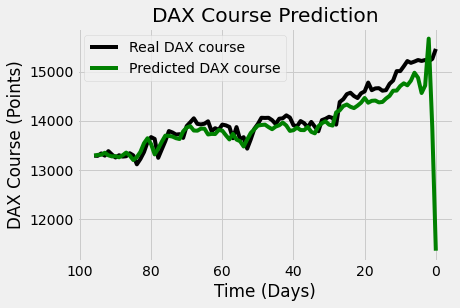

In [25]:
plt.plot(real_price, color = 'black', label = 'Real DAX course')
plt.plot(predicted_price, color = 'green', label = 'Predicted DAX course')
plt.title('DAX Course Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('DAX Course (Points)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Saving the model

In [23]:
import os.path
if os.path.isfile('models/dax_pred_model_9')is False:
    model.save('models/dax_pred_model_9')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/dax_pred_model_9\assets
